In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
# import data and show first 5 rows
data = pd.read_csv("netflix_data.csv")
print(data.head())

  show_id     type  title           director  \
0      s2    Movie   7:19  Jorge Michel Grau   
1      s3    Movie  23:59       Gilbert Chan   
2      s4    Movie      9        Shane Acker   
3      s5    Movie     21     Robert Luketic   
4      s6  TV Show     46        Serdar Akar   

                                                cast        country  \
0  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
1  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
2  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
3  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
4  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...         Turkey   

          date_added  release_year  duration  \
0  December 23, 2016          2016        93   
1  December 20, 2018          2011        78   
2  November 16, 2017          2009        80   
3    January 1, 2020          2008       123   
4       July 1, 2017          2016         1

In [4]:
# get dataframe info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB
None


In [36]:
# count the munumber of shows released for each director
count_movies_by_director = data.groupby("director")["show_id"].count()
print(count_movies_by_director.sort_values(ascending=False).head(20))

director
Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Jay Chapman               12
Youssef Chahine           12
Steven Spielberg          10
David Dhawan               9
Johnnie To                 8
Robert Rodriguez           8
Shannon Hartman            8
Hakan Algül                8
Ryan Polito                8
Yılmaz Erdoğan             7
Don Michael Paul           7
Justin G. Dyck             7
Quentin Tarantino          7
Lance Bangs                7
Kunle Afolayan             7
Name: show_id, dtype: int64


In [55]:
# check the shows' released country from Raúl Campos, Jan Suter 
shows_by_raul = data[data["director"] == "Raúl Campos, Jan Suter"]
shows_by_raul_table = shows_by_raul.pivot_table(index="release_year", columns="country", values="show_id", aggfunc="count")
print(shows_by_raul_table)

country       Argentina  Chile  Colombia  Mexico
release_year                                    
2016                NaN    NaN       NaN     3.0
2017                NaN    NaN       NaN     3.0
2018                5.0    2.0       2.0     3.0


In [49]:
# count top 20 released show by director and the country it's from
count_movies_by_director = data.groupby(["country", "director"])["show_id"].count()
print(count_movies_by_director.sort_values(ascending=False).head(20))

country        director              
United States  Marcus Raboy              15
               Jay Karas                 14
Philippines    Cathy Garcia-Molina       13
United States  Jay Chapman               12
               Martin Scorsese           10
               Steven Spielberg          10
India          David Dhawan               9
Mexico         Raúl Campos, Jan Suter     9
Egypt          Youssef Chahine            9
United States  Ryan Polito                8
Hong Kong      Johnnie To                 8
United States  Robert Rodriguez           8
Turkey         Hakan Algül                8
United States  Shannon Hartman            8
Nigeria        Kunle Afolayan             7
Turkey         Yılmaz Erdoğan             7
United States  McG                        7
               Lance Bangs                7
India          Imtiaz Ali                 6
Egypt          Sameh Abdulaziz            6
Name: show_id, dtype: int64


In [86]:
# filter 10 countries which has the most released shows
count_movies_by_director = data.groupby("country")["show_id"].count()
top10 = count_movies_by_director.sort_values(ascending=False).head(10)
top10_name = [name for name in top10_country.keys()]
print(top10)
print(top10_name)

country
United States     1886
India              864
United Kingdom     311
Canada             155
France             133
Spain              112
Egypt               91
Japan               81
Turkey              81
Mexico              74
Name: show_id, dtype: int64
['United States', 'India', 'United Kingdom', 'Canada', 'France', 'Spain', 'Egypt', 'Japan', 'Turkey', 'Mexico']


In [113]:
# shows released through out the years
top10_info = data[data["country"].isin(top10_name)]
top10_info_20_year = top10_info[top10_info["release_year"] >= 2000]
top10_through_year = top10_info.pivot_table(index="release_year", columns="country", values="show_id", aggfunc="count")
top10_in_20_year_table = top10_info_20_year.pivot_table(index="release_year", columns="country", values="show_id", aggfunc="count")
print(top10_through_year)
print(top10_in_20_year_table)

country       Canada  Egypt  France  India  Japan  Mexico  Spain  Turkey  \
release_year                                                               
1942             NaN    NaN     NaN    NaN    NaN     NaN    NaN     NaN   
1944             NaN    NaN     NaN    NaN    NaN     NaN    NaN     NaN   
1945             NaN    NaN     NaN    NaN    NaN     NaN    NaN     NaN   
1946             NaN    NaN     NaN    NaN    NaN     NaN    NaN     NaN   
1947             NaN    NaN     NaN    NaN    NaN     NaN    NaN     NaN   
...              ...    ...     ...    ...    ...     ...    ...     ...   
2017           29.00  10.00   16.00  98.00  12.00   12.00  21.00    9.00   
2018           27.00   9.00   19.00  85.00  12.00   11.00  27.00    7.00   
2019           13.00   4.00   20.00  73.00   8.00    9.00  19.00    6.00   
2020           18.00    NaN   12.00  52.00   6.00    8.00  11.00    1.00   
2021            1.00    NaN     NaN    NaN    NaN     NaN   1.00     NaN   

country    

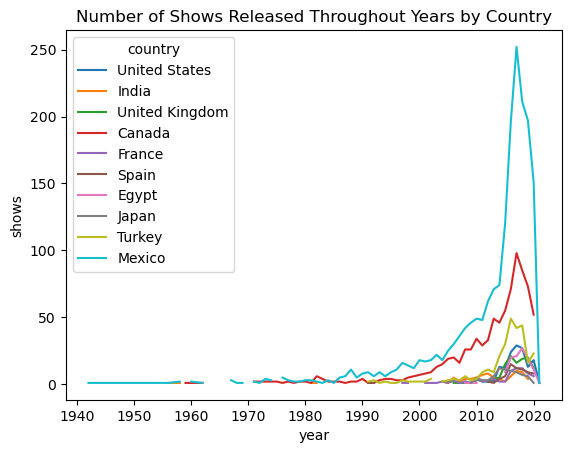

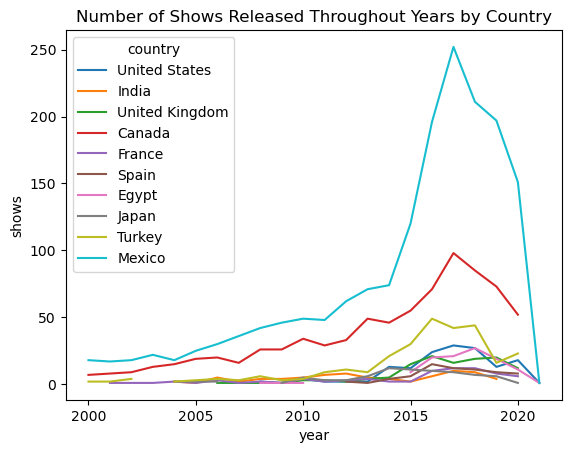

In [114]:
# show top 10 in chart
top10_chart = plt.plot(top10_through_year)
plt.title("Number of Shows Released Throughout Years by Country")
plt.xlabel("year")
plt.ylabel("shows")
plt.legend(top10_name, title="country")
plt.show()

# filter to show recent 20 years
top10_chart = plt.plot(top10_in_20_year_table)
plt.title("Number of Shows Released Throughout Years by Country")
plt.xlabel("year")
plt.ylabel("shows")
plt.legend(top10_name, title="country")
plt.show()

In [109]:
# extract year from date_added and Calculate the gap between
# the release year and the year it was added to Netflix
# add a new colum
data["date_added"] = pd.to_datetime(data["date_added"])
data["added_year"] = data["date_added"].dt.year
data["gap"] = data["added_year"] - data["release_year"]
avg_gap = data["gap"].mean()
pd.options.display.float_format = "{:,.2f}".format
max_gap = data["gap"].max()
print(f"The average gap is {avg_gap}.")
print(f"The bigest gap is {max_gap}.")

The average gap is 5.80195344970906.
The bigest gap is 75.


In [110]:
# the movie released earliest
print(data[data["gap"] == 75])

     show_id   type                 title   director  \
3809   s6118  Movie  The Battle of Midway  John Ford   

                           cast        country date_added  release_year  \
3809  Henry Fonda, Jane Darwell  United States 2017-03-31          1942   

      duration                                        description  \
3809        18  Director John Ford captures combat footage of ...   

               genre  added_year  gap  
3809  Classic Movies        2017   75  


In [111]:
# the type of shows
print(data.groupby("type")["show_id"].count())

type
Movie      4677
TV Show     135
Name: show_id, dtype: int64
